# Estatística Básica - Continuação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
# biblioteca que já tem vários datasets embutidos

mpg = sns.load_dataset('mpg')

# informações sobre o dataset
# https://archive.ics.uci.edu/ml/datasets/auto+mpg
# Os dados referem-se ao consumo de combustível em milhas por galão (mpg)

# mpg, cilindros, cilindrada, potência, peso, aceleração, ano/modelo, origem, nome do carro
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

## 2.2 - Medidas de posição
### 2.2.1 - Média

Seja $X$ uma variável quantitativa e $x_1,x_2,x_3, ...$ os valores assumidos por X. Define-se média de $\overline{x}$ como sendo :


$$\overline{x} = \frac{\sum_{i=1}^{n}x_i}{n}= \frac{x_1+ x_2 + x_3 +... +x_n}{n}$$

In [2]:
# Define uma semente randômica
np.random.seed(42)

# Vamos criar uma amostra aleatória de numéros inteiros
amostra = np.random.randint(1, 20, 12)

# Print da amostra
print("Dados:", amostra)

# Print da Média da Amostra
print("\nMédia dos dados:", amostra.mean())

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2]

Média dos dados: 8.833333333333334


In [3]:
# No nosso dataset
mpg['mpg'].mean()

23.514572864321615

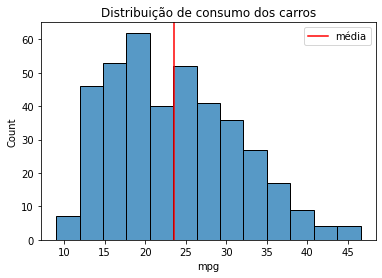

In [4]:
# análise gráfica-> dados quantitativos contínuos

sns.histplot(mpg['mpg'])
plt.axvline(mpg['mpg'].mean(), color='red', label='média')

plt.title('Distribuição de consumo dos carros')

# Cria uma legenda
plt.legend()

plt.show()

### 2.2.2 - Mediana

A **mediana** de uma variável é um número tal que há o mesmo número de observações maiores e menores do que ele, ocupando assim a posição central da série de observações.

Assim, para calcularmos a mediana, *basta ordenarmos os dados, do menor pro maior*, e contar o que está no meio dos dados ordenados (se houver número par de dados, pega-se a média entre os dados que estão "no meio")


- - Mediana de $X = X_{\frac{n+1}{2}}$ `Se tamanho da amostra ímpar`


- - Mediana de $X = \frac{X_{\frac{n}{2}}+ X_{\frac{n+1}{2}}}{2}$ `Se tamanho da amostra par`

Como os valores de **indice no python** começam em `0`, devemos nos atentar que a equação acima deve ficar como:

- - Mediana de $X = X_{\frac{n}{2}}$ `Se tamanho da amostra par`


- - Mediana de $X = \frac{X_{\frac{n-1}{2}}+ X_{\frac{n}{2}}}{2}$ `Se tamanho da amostra ímpar`

Exemplo  

i) 3,4,7,8,8   
mediana =  (CASO ÍMPAR)

ii) 3,4,7,8,8,9   
mediana =  (CASO PAR)

In [5]:
# Define a semente randômica
np.random.seed(42)

# Cria uma amostra de números aleatórios
amostra = np.random.randint(1, 20, 13)

# Print da Amostra
print("Dados:", amostra)

# Print da Amostra Ordenada
print("\nDados ordenados:", sorted(amostra))

# Print do Valor da Mediana
print("\nMediana dos dados:", np.median(amostra))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]

Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19]

Mediana dos dados: 8.0


In [6]:
# No nosso dataset
mpg['mpg'].median()

23.0

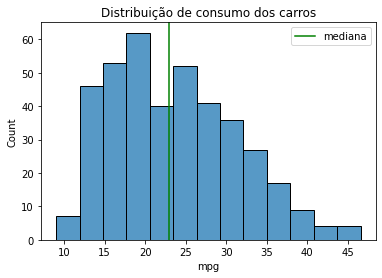

In [7]:
# Na representação gráfica

# análise gráfica-> dados quantitativos contínuos

sns.histplot(mpg['mpg'])

# plotando a mediana
plt.axvline(mpg["mpg"].median(), color="green", label="mediana")

plt.title('Distribuição de consumo dos carros')

# Cria uma legenda
plt.legend()

plt.show()

### 2.2.3 - Quartil e Percentil

**Quartis**

Dividem a distribuição em **quatro** partes iguais com os dados ordenados:

- 1º quartil: o valor que deixa 25% dos dados abaixo dele e 75% acima dele

- 2º quartil: o valor que deixa 50% dos dados abaixo dele e 50% acima dele, ou seja, é a mediana

- 3º quartil: o valor que deixa 75% dos dados abaixo dele e 25% acima dele

Generalizando: percentil Pn é o valor que deixa n% dos dados abaixo dele e (100 - n% acima dele)

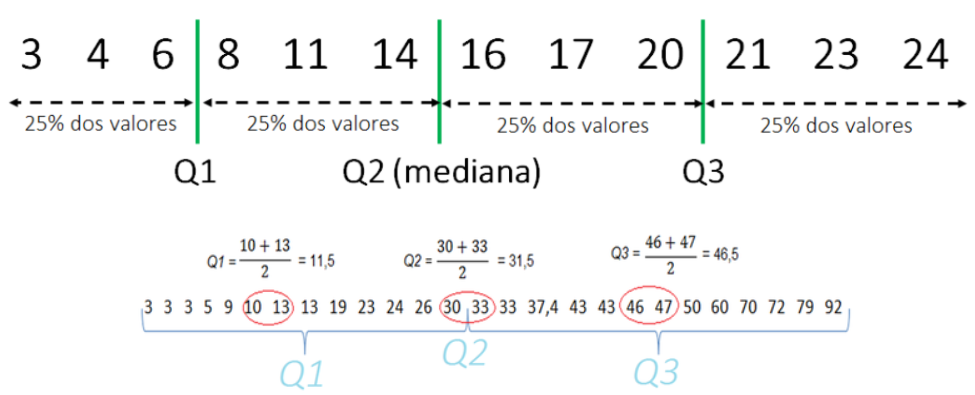

In [8]:
# Print da Amostra
print("Dados:", amostra)

# Print da Amostra Ordenada
print("\nDados Ordenados:", sorted(amostra))

# Print dos Quartis
print("\nQ1:", np.quantile(amostra, 0.25))
print("\nQ2:", np.quantile(amostra, 0.50))
print("\nQ3:", np.quantile(amostra, 0.75))
print("\n0.1-quantile:", np.quantile(amostra, 0.1))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]

Dados Ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19]

Q1: 7.0

Q2: 8.0

Q3: 11.0

0.1-quantile: 3.2


In [9]:
# no nosso dataset
mpg['mpg'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    13.00
0.25    17.50
0.50    23.00
0.75    29.00
0.95    37.03
Name: mpg, dtype: float64

**Percentil**

O valor tal que _P_ por cento dos dados estão abaixo

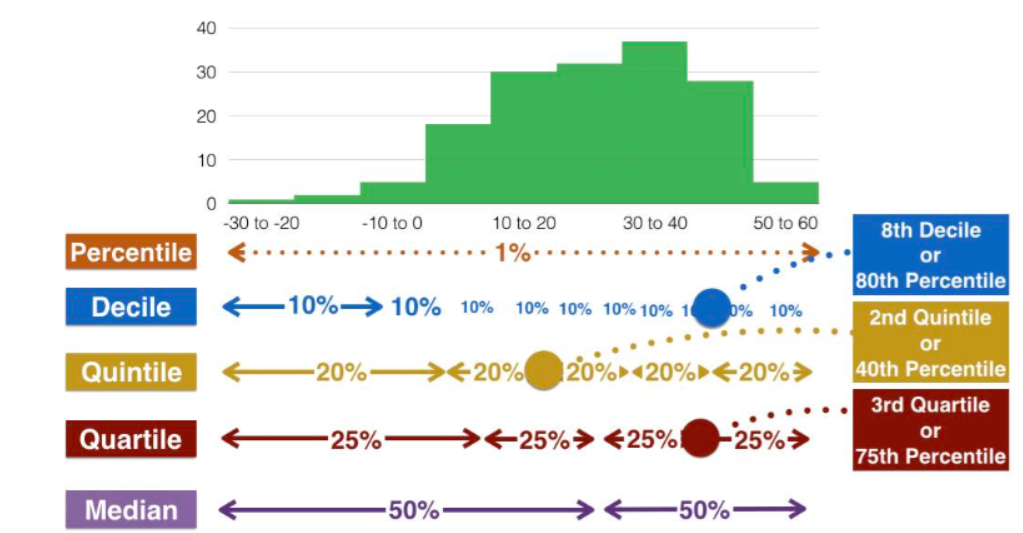

In [10]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(mpg['mpg'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

     5.0%  25.0%  50.0%  75.0%  95.0%
mpg  13.0   17.5   23.0   29.0  37.03


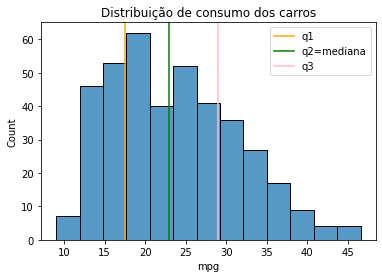

In [11]:
# Na representação gráfica

sns.histplot(mpg['mpg'])

# plotando a mediana
plt.axvline(mpg["mpg"].quantile(0.25), color="orange", label="q1")
plt.axvline(mpg["mpg"].quantile(0.5), color="green", label="q2=mediana")
plt.axvline(mpg["mpg"].quantile(0.75), color="pink", label="q3")

plt.title('Distribuição de consumo dos carros')

# Cria uma legenda
plt.legend()

plt.show()

### 2.2.4 - Moda

A **moda** é o valor que ocorre com **mais frequencia** em um conjunto de dados 

Dependendo do conjunto de dados, ele pode ser:

- Sem moda: quando nenhum valor se repete 

- unimodal: Quando existe apenas um valor repetido com maior frequência 

- bimodal- quando existem dois valores com a mesma frequência

In [12]:
# Print da Amostra
print("Dados:", amostra)

from scipy import stats
print("\nModa dos dados e sua frequencia:", stats.mode(amostra))


Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]

Moda dos dados e sua frequencia: ModeResult(mode=array([11]), count=array([3]))


In [13]:
# no dataset

mpg['mpg'].mode()

0    13.0
dtype: float64

In [14]:
# outra forma de verificar a quantidade de valores é:

mpg['mpg'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64

In [15]:
# Um exemplo com 2 valores de moda
pd.Series([1,1,2,2,3,4,5,6,7,8]).mode()

0    1
1    2
dtype: int64

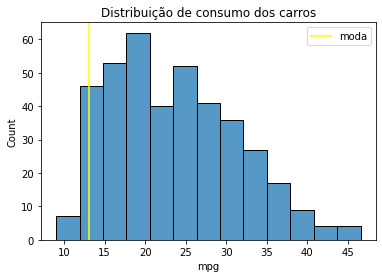

In [16]:
# Na representação gráfica

sns.histplot(mpg['mpg'])

# plotando a mediana
plt.axvline(mpg["mpg"].mode()[0], color="yellow", label="moda")

plt.title('Distribuição de consumo dos carros')

# # Loop para plotar as modas
# for i in range(mpg["mpg"].mode().shape[0]):
#     plt.axvline(mpg["mpg"].mode()[i], color="yellow", label="moda")

# Cria uma legenda
plt.legend()

plt.show()

De forma geral,   
__Métricas de Posição:__ Estas são medidas que **resumem** algumas propriedades do conjunto de dados:

<img src="https://i.pinimg.com/originals/3e/8a/90/3e8a90c122ad25240cc46ac075cb0f4c.png" width=200>

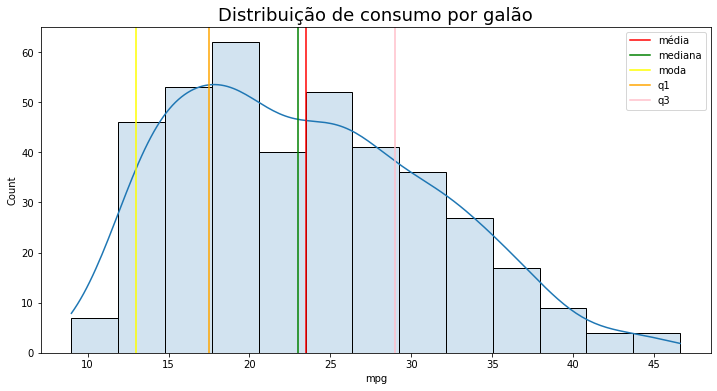

In [17]:
# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Define o Titulo
plt.title("Distribuição de consumo por galão", size=18)

# Plot do Histograma
sns.histplot(mpg["mpg"], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=mpg["mpg"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(mpg["mpg"].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(mpg["mpg"].mode().shape[0]):
    plt.axvline(mpg["mpg"].mode()[i], color="yellow", label="moda")

plt.axvline(mpg["mpg"].quantile(0.25), color="orange", label="q1")
plt.axvline(mpg["mpg"].quantile(0.75), color="pink", label="q3")

# Cria uma legenda
plt.legend()

# Mostra o Gráfico
plt.show()

## 2.3 - Medidas de dispersão
Quantificam a **variabilidade** (ou dispersão) dos dados. Medidas de variabilidade indicam o quanto as observações variam ao redor da medida de centralidade. Em outras palavras, indicam o quão longe podemos esperar que uma observação esteja do valor típico para aquela variável. Existem diversas medidas de variabilidade, algumas das quais apresentamos a seguir.

### 2.3.1 - Mínimo, Máximo e Amplitude

Mínimo de um conjunto de dados é o número de menor valor
Máximo de um conjunto de dados é o número de maior valor
Amplitude de um conjunto de dados é a diferença entre o maior e o menor valor observado. Esta medida de variabilidade é **fortemente** influenciada por valores extremos nas observações, como **outliers**. 

In [18]:
# Define um array de amostra
amostra2 = np.array([2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19, 87])
print("Amostra:", amostra2)
print("\nAmostra ordenados:", amostra2)
print("\nMínimo:", np.min(amostra2))
print("\nMáximo:", np.max(amostra2))
print("\nAmplitude:", amostra2.max() - amostra2.min())

Amostra: [ 2  3  4  7  7  8  8 11 11 11 12 15 19 87]

Amostra ordenados: [ 2  3  4  7  7  8  8 11 11 11 12 15 19 87]

Mínimo: 2

Máximo: 87

Amplitude: 85


In [19]:
# No nosso dataset
mpg['mpg'].min()

9.0

In [20]:
mpg['mpg'].max()

46.6

In [21]:
mpg['mpg'].max() - mpg['mpg'].min()

37.6

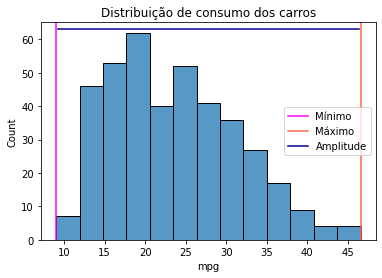

In [22]:
# Na representação gráfica

sns.histplot(mpg['mpg'])

# plotando a mediana
plt.axvline(mpg["mpg"].min(), color="magenta", label="Mínimo")
plt.axvline(mpg["mpg"].max(), color="tomato", label="Máximo")
plt.axhline(y=63, xmin=0.05, xmax=0.95, color="darkblue", label="Amplitude")

plt.title('Distribuição de consumo dos carros')

# Cria uma legenda
plt.legend()

plt.show()

### 2.3.2 -  Intervalo Interquartil (IQR) e Diagrama de caixa (boxplot)

**Intervalo interquartil**

Por construção, aproximadamente metade dos dados estão entre o 1º e o 3º quartil, isto é, este também pode ser interpretado como um intervalo de valores tipicamente assumidos pelas observações. 

IQR (interquartile range) = Q3 – Q1

Upper outliers: Q3 + 1,5(IQR) 
Lower outliers: Q1 - 1,5(IQR) 

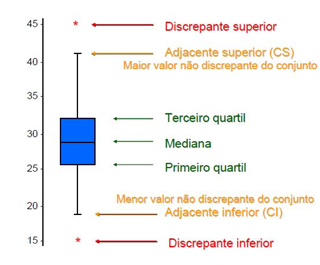

In [23]:
# Print da Amostra
print("Dados:", amostra)

# Print da Amostra Ordenada
print("\nDados ordenados:", sorted(amostra))

# Calcula o intervalo interquartil
iqr = np.quantile(amostra, 0.75) - np.quantile(amostra, 0.25)

# Print do IQR
print("\nIQR:", iqr)

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]

Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19]

IQR: 4.0


In [24]:
# No nosso dataset

mpg['mpg'].quantile(q=0.75) - mpg['mpg'].quantile(q=0.25)

11.5

**boxplot**

O boxplot (gráfico de caixa) é um gráfico utilizado para avaliar a distribuição empírica do dados. O boxplot é formado pelo primeiro e terceiro quartil e pela mediana. As hastes conhecidos como bigodes (**whiskers**) inferiores e superiores se estendem, respectivamente, do quartil inferior até o menor valor não inferior ao limite inferior e do quartil superior até o maior valor não superior ao limite superior. Os limites são calculados da forma abaixo:

Limite inferior: $ \max\{\min(\text{dados});Q_1-1,5(Q_3-Q_1)\} $.

Limite superior: $ \min\{\max(\text{dados});Q_3+1,5(Q_3-Q_1)\} $.

Para este caso, os pontos fora destes limites são considerados valores discrepantes (Outliers) e são denotados por asterisco (*). A Figura  a seguir apresenta um exemplo do formato de um boxplot.

<img src=https://miro.medium.com/max/8000/1*0MPDTLn8KoLApoFvI0P2vQ.png width=500>

O boxplot pode ainda ser utilizado para uma comparação visual entre dois ou mais grupos. Por exemplo, duas ou mais caixas são colocadas lado a lado e se compara a variabilidade entre elas, a mediana e assim por diante. Outro ponto importante é a diferença entre os quartis $ (Q_3 - Q_1) $ que é uma medida da variabilidade dos dados.

### Outliers

**Outliers** ou **discrepantes** referem-se a obsevações **extremas**, que se deslocam em muito das outras observações em um conjunto de dados, ou seja, que **destoam do padrão da distribuição** dos dados. Outliers podem existir por motivos diferentes, alguns dos quais são:

- erro na entrada de dados (erro humano);
- erro na medição/coleta dos dados (erro instrumental);
- erros experimentais (planejamento/execução dos experimentos);
- outliers naturais (não decorrente de erros)

<img src="https://miro.medium.com/max/700/1*J5Xm0X-phCJJ-DKZMZ_88w.png">

No caso dos erros, é importante que os outliers sejam tratados (comumente são removidos). Por outro lado, outliers naturais são importantes constituintes dos dados, de modo que não devem ser eliminados mas, muitas vezes, devem ser tratados.

De qualquer modo, antes de começarmos a pensar em como **tratar** os outliers, o primeiro passo é **identificá-los** e a melhor forma para isso é utilizar dos boxplots.

Em resumo, o outlier:
- É o dado que é muito diferente/distante da maioria dos outros
- Não é errado ou inválido
- Interfere na média
- Deve ser investigado


Dados ordenados: [2, 3, 4, 7, 7, 8, 8, 11, 11, 11, 12, 15, 19]

q1: 7.0
q2: 11.0

média: 9.076923076923077
mediana: 8.0

IQR: 4.0


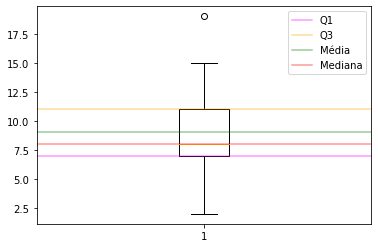

In [25]:
# Print da Amostra Ordenada
print("\nDados ordenados:", sorted(amostra))

print("\nq1:",np.quantile(amostra, 0.25))
print("q2:",np.quantile(amostra, 0.75))
print("\nmédia:",np.mean(amostra))
print("mediana:",np.median(amostra))

# Calcula o intervalo interquartil
iqr = np.quantile(amostra, 0.75) - np.quantile(amostra, 0.25)

# Print do IQR
print("\nIQR:", iqr)

plt.boxplot(amostra, meanline=False)
plt.axhline(np.quantile(amostra, 0.25), color="magenta", label="Q1", alpha=0.4)
plt.axhline(np.quantile(amostra, 0.75), color="orange", label="Q3", alpha=0.4)
plt.axhline(np.mean(amostra), color="green", label="Média", alpha=0.4)
plt.axhline(np.median(amostra), color="red", label="Mediana", alpha=0.4)
plt.legend()
plt.show()

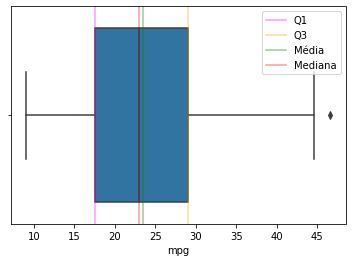

In [26]:
# visualização gráfica

sns.boxplot(data=mpg, x='mpg')
plt.axvline(np.quantile(mpg['mpg'], 0.25), color="magenta", label="Q1", alpha=0.4)
plt.axvline(np.quantile(mpg['mpg'], 0.75), color="orange", label="Q3", alpha=0.4)
plt.axvline(np.mean(mpg['mpg']), color="green", label="Média", alpha=0.4)
plt.axvline(np.median(mpg['mpg']), color="red", label="Mediana", alpha=0.4)
plt.legend()
plt.show()

### 2.3.3 - Variância e desvio padrão

Mede o quando os dados estão longe da média


**Variância:**


A variância representa **o quanto os dados se afastam da média, em geral**. Por definição, tomamos a média dos **desvios quadráticos da média**:

$$ s^2 =Var(X) = \sum_{i=1}^{n}\frac{(x-\overline{x})^{2}}{n-1} = \frac{(x_1-\overline{x})^{2}}{n-1} + \frac{(x_2-\overline{x})^{2}}{n-1} + \cdots$$

In [27]:
# Print dos Dados
print("Dados:", amostra)

# Print do Valor da Variância
print("\nVariância:", np.var(amostra))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]

Variância: 21.301775147928993


In [28]:
#no nosso dataset
mpg['mpg'].var()

61.089610774274405

**Desvio padrão:**

Note que, da forma como foi definida, a variância é um valor **quadrático** nos dados. Para evitar isso, é comum tirar a raiz quadrada da variância, o que define o **desvio padrão**:
$$ s = \sqrt{\sum_{i=1}^{n}\frac{(x-\overline{x})^{2}}{n}}$$

Usamos mais o desvio padrão pois está na mesma escala dos dados originais

In [29]:
# Print da Amostra
print("Dados:", amostra)

# Print do Desvio Padrão
print("\nDesvio Padrão:", np.std(amostra))

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]

Desvio Padrão: 4.615384615384615


In [30]:
#no nosso dataset
mpg['mpg'].std()

7.815984312565782

### 2.3.4 - Assimetria

É o **grau de desvio ou afastamento** da **simetria** de uma distribuição. Quando a curva é simétrica, a `média`, a `mediana` e a `moda` coincidem, num mesmo ponto, havendo um perfeito equilíbrio na distribuição. Um exemplo de distribuição simétrica é a **distribuição normal**. Quando o equilíbrio não acontece, a média, a mediana e a moda recaem em pontos diferentes da distribuição, e a distribuição se torna **assimétrica**:

<img src="https://www.researchgate.net/profile/Marco_Faria/publication/294890337/figure/fig5/AS:668873900716049@1536483373457/a-Negative-skewness-b-Normal-curve-c-Positive-skewness-Durkhure-and-Lodwal-2014.ppm" width=600>


- Distribuição assimétrica **Negativa ou enviesada a esquerda**: quando os valores se concentram na extremidade superior da escala e se distribuem gradativamente em direção à extremidade inferior.

- Distribuição assimétrica **Positiva ou enviesada a direita**: quando os valores se concentram na extremidade inferior da escala e se distribuem gradativamente em direção à extremidade superior.

A medidade de assimetria é conhecida como **skewness**, sendo calculada como:

$$ s(X) = \frac{1}{\sigma^3}\sum_{i=1}^{n}\frac{(x-\overline{x})^{3}}{n}$$

O valor da skewness nos indica a assimetria da distribuição:

- s = 0: distribuição simétrica
- s > 0: assimetria à direira
- s < 0: assimetria à esquerda

In [31]:
print("Dados:", amostra)

print("\nSkewness:", pd.Series(amostra).skew())

Dados: [ 7 15 11  8  7 19 11 11  4  8  3  2 12]

Skewness: 0.4451611199464395


In [32]:
# no nosso dataset
mpg['mpg'].skew()

0.45706634399491913

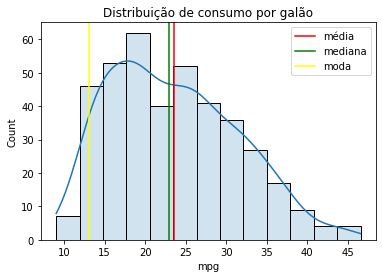

In [33]:
# Define o Titulo
plt.title("Distribuição de consumo por galão")

# Plot do Histograma
sns.histplot(mpg["mpg"], kde=True, alpha=0.2)

# plotando média
plt.axvline(x=mpg["mpg"].mean(), color="red", label="média")

# plotando a mediana
plt.axvline(mpg["mpg"].median(), color="green", label="mediana")

# Loop para plotar as modas
for i in range(mpg["mpg"].mode().shape[0]):
    plt.axvline(mpg["mpg"].mode()[i], color="yellow", label="moda")

# Cria uma legenda
plt.legend()

# Mostra o Gráfico
plt.show()

## 2.4 - Métricas de associação entre variáveis quantitativas


Sejam $X$ e $Y$ variáveis quantitativas de interesse e as amostras aleatórias observadas $x_1,\ldots,x_n$ e $y_1,\ldots,y_n$, respectivamente. As medidas de associação mais utilizadas são:
<br>

### 2.4.1 Covariância 

A __Covariância__ faz uma comparação similar que a variância, com a diferença que está comparação é entre variáveis distintas $X$ e $Y$:

$s_{XY} = \displaystyle{\frac{\displaystyle\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{n-1}}$

### 2.4.2 Correlação

Um dos conceitos mais importantes em Data Science é o da **correlação**. A partir de estudos de correlação, é possível **descobrirmos como diferentes variáveis interagem**.
<br>
<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=700>
<br>
É bem importante distinguirmos correlações **lineares** de **não lineares**. 
<br>
<img src="https://miro.medium.com/max/1414/1*ZMwog-_YcD0qBHc9_1T1-w.png" width=700>
<br>
Para fazer a distinção acima, há testes específicos para correlação. Vamos ver dois coeficientes de correlação específicos que sâo: __Pearson__ e __Spearmann__

**Correlação de Pearson**

A [__Correlação de Pearson__](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) é expressa como  a **taxa de relação linear entre duas variáveis numéricas**. Quanto mais próximo de 1 ou -1, mais **linearmente correlacionado estão as variáveis testadas**. A fórmula define-se como:


$r = \displaystyle{\frac{s_{XY}}{\sqrt{s^2_X s^2_Y }}}$


Propriedade: 

 $-1 \leq r \leq 1$


É comum usar as seguintes classificações:

1. $r=1$ indica uma correlação perfeita e positiva

2. $r=-1$ indica uma correlação perfeita e negativa

3. $0.7 \leq |r| \leq 1$ indica uma correlação forte

4. $0.5 \leq |r| \leq 0.69$ indica uma correlação moderada

5. $0 \leq |r| \leq 0.49$ indica uma correlação fraca
<br>

**Correlação de Spearman**

[__Correlação de Spearmann__](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_postos_de_Spearman) e outra correlação linear bem conhecida e este coeficiente indica se as amostras possuem correlação *monotônica*, isso é, **se aumentarmos ou diminuimos uma, a outra irá aumentar ou diminuir**. 

O coeficiente varia entre -1 e 1:

> Quanto mais próximo de 1 for o coeficiente, mais positivamente correlacionada as amostras, isso é, se aumentarmos uma, a outra ira aumentar (ou se diminuimos uma, a outra irá diminuir); 

> Quanto mais próximo de -1 for o resultado, mais negativamente correlacionada estão as variáveis, isso é, aumentando uma, a outra irá dimunuir (ou se diminuímos uma, a outra irá aumentar). 

> Uma correlação de 0 indica ausência de correlação.

**Importante:** o coeficiente de Spearman **não** indica correlação necessariamente linear!

In [34]:
# no nosso dataset
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<AxesSubplot:>

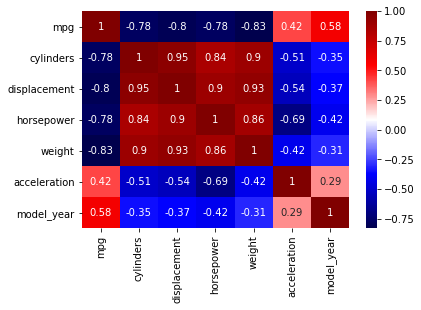

In [35]:
sns.heatmap(mpg.corr(), annot=True, cmap='seismic')

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

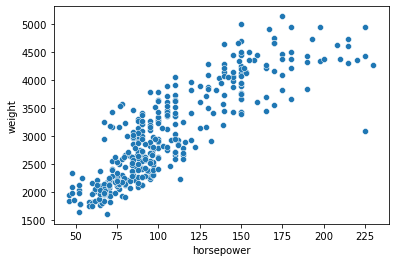

In [36]:
sns.scatterplot(data=mpg, x='horsepower', y='weight')

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

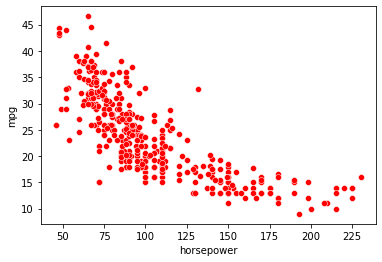

In [37]:
sns.scatterplot(data=mpg, x='horsepower', y='mpg', color='r')

<AxesSubplot:xlabel='acceleration', ylabel='weight'>

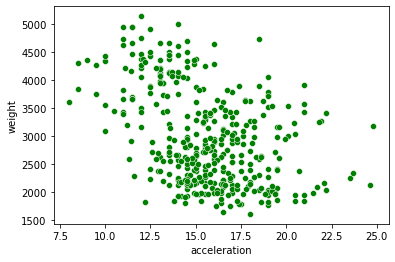

In [38]:
sns.scatterplot(data=mpg, x='acceleration', y='weight', color='g') #model_year

In [39]:
mpg.corr(method='spearman') # method{‘pearson’, ‘kendall’, ‘spearman’} 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677,0.573469
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189,-0.335012
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512,-0.305257
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550,-0.277015
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000,0.274632
model_year,0.573469,-0.335012,-0.305257,-0.389498,-0.277015,0.274632,1.000000


**CUIDADO**  
Correlação não implica em causalidade

https://www.tylervigen.com/spurious-correlations

## 2.4 - Tabelas de dados
### 2.4.1 - Tabelas de frequência

A distribuição de frequências é um agrupamento de dados em classes, de tal forma que contabilizamos o número de ocorrências em cada classe. O número de ocorrências de uma determinada classe recebe o nome de frequência absoluta. O objetivo é apresentar os dados de uma maneira mais concisa e que nos permita extrair informação sobre seu comportamento. A seguir, apresentamos algumas definições necessárias à construção da distribuição de frequências.

**Frequência absoluta (ƒi):** É o número de observações correspondente a cada classe. A frequência absoluta é, geralmente, chamada apenas de frequência.

**Frequência relativa (ƒri):** É o quociente entre a frequência absoluta da classe correspondente e a soma das frequências (total observado), isto é, $ \displaystyle f_{ri}=\frac{f_i}{\sum_{j}f_j} $ onde n representa o número total de observações.

**Frequência percentual (pi):** É obtida multiplicando a frequência relativa por 100%.

**Frequência acumulada:** É o total acumulado (soma) de todas as classes anteriores até a classe atual. Pode ser: frequência acumulada absoluta (Fi), frequência acumulada relativa (Fri), ou frequência acumulada percentual (Pi).maneira




In [40]:
freq_table = pd.concat([mpg.origin.value_counts(),
                        mpg.origin.value_counts(normalize = True)],
                       axis = 1,
                       keys = ("freq", "freq_relativa"))
freq_table

,freq,freq_relativa
usa,249,0.625628
japan,79,0.198492
europe,70,0.175879


In [41]:
freq_table['freq_percentual'] = freq_table['freq_relativa']*100
freq_table

,freq,freq_relativa,freq_percentual
usa,249,0.625628,62.562814
japan,79,0.198492,19.849246
europe,70,0.175879,17.587940


In [42]:
freq_table['freq_acumulada'] = freq_table['freq_percentual'].cumsum()
freq_table

,freq,freq_relativa,freq_percentual,freq_acumulada
usa,249,0.625628,62.562814,62.562814
japan,79,0.198492,19.849246,82.412060
europe,70,0.175879,17.587940,100.000000


Quando se tem apenas dados categóricos não conseguimos diretamente pensar em visualizações e portanto é de interesse calcular 

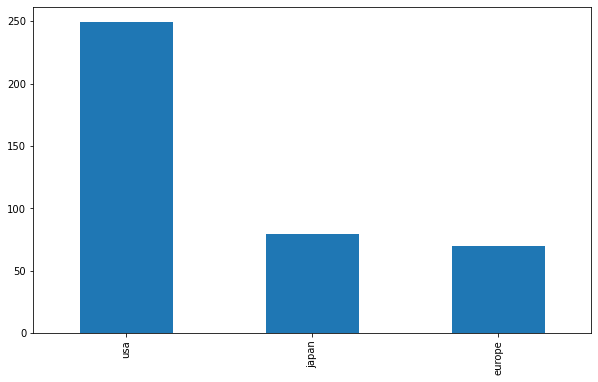

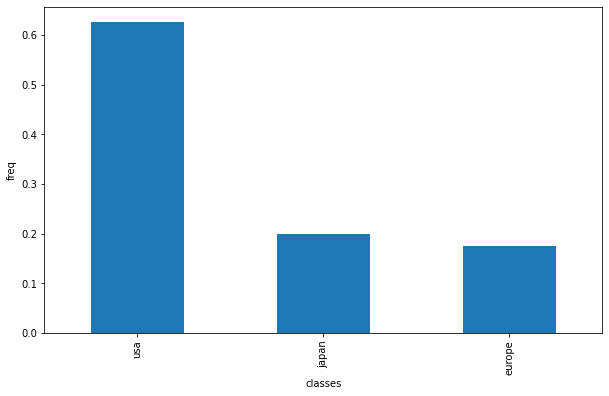

In [43]:
plt.figure(figsize=(10,6))
freq_table.freq.plot(kind = "bar")
plt.show()
ax = freq_table.freq_relativa.plot.bar(figsize=(10,6))
ax.set_xlabel("classes")
ax.set_ylabel("freq")
plt.show()

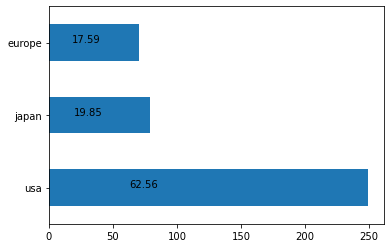

In [44]:
ax = freq_table.freq.plot(kind='barh') # s is a Series (float) in [0,1]
[ax.text(v, i, f'{v:.2f}') for i, v in enumerate(freq_table.freq_percentual)];

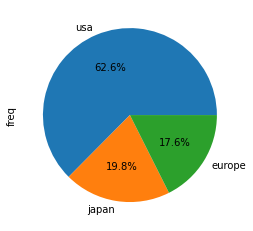

In [45]:
freq_table.freq.plot.pie(autopct='%1.1f%%');

# "If you torture the data long enough, it will confess." — Ronald H. Coase